## Data Cleaning & EDA
---

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.options.display.max_rows = 999

In [2]:
url = "https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpahuac81f.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489572 entries, 0 to 489571
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      489572 non-null  object 
 1   OFFENSE_CODE         489572 non-null  int64  
 2   OFFENSE_CODE_GROUP   426839 non-null  object 
 3   OFFENSE_DESCRIPTION  489572 non-null  object 
 4   DISTRICT             487149 non-null  object 
 5   REPORTING_AREA       489572 non-null  object 
 6   SHOOTING             64479 non-null   object 
 7   OCCURRED_ON_DATE     489572 non-null  object 
 8   YEAR                 489572 non-null  int64  
 9   MONTH                489572 non-null  int64  
 10  DAY_OF_WEEK          489572 non-null  object 
 11  HOUR                 489572 non-null  int64  
 12  UCR_PART             426729 non-null  object 
 13  STREET               471681 non-null  object 
 14  Lat                  461109 non-null  float64
 15  Long             

In [6]:
data.drop(columns=['INCIDENT_NUMBER', 
                   'Location'], inplace=True)

In [7]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE']) 

In [8]:
data.isnull().sum()

OFFENSE_CODE                0
OFFENSE_CODE_GROUP      62733
OFFENSE_DESCRIPTION         0
DISTRICT                 2423
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                62843
STREET                  17891
Lat                     28463
Long                    28463
dtype: int64

In [10]:
missing_lat = data.loc[data['Lat'].isna()]
data.drop(index=missing_lat.index, inplace=True)

In [11]:
data.isnull().sum()

OFFENSE_CODE                0
OFFENSE_CODE_GROUP      61474
OFFENSE_DESCRIPTION         0
DISTRICT                 1918
REPORTING_AREA              0
SHOOTING               397950
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                61583
STREET                   7952
Lat                         0
Long                        0
dtype: int64

In [12]:
data.columns = data.columns.str.lower()

In [13]:
codes = pd.read_excel('rmsoffensecodes.xlsx')

In [14]:
codes.shape

(576, 2)

In [15]:
codes.head()

,CODE,NAME
0,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE
1,3830,M/V - LEAVING SCENE - PERSONAL INJURY
2,3821,M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY
3,3820,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
4,3811,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY


In [16]:
data['ucr_part'].unique()

array([nan, 'Part One', 'Part Three', 'Part Two', 'Other'], dtype=object)

In [17]:
part_one = data.loc[data['ucr_part'] == 'Part One', :]

In [18]:
part_one.head()

,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long
30,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563
31,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710
32,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096
33,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402
34,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551


In [19]:
part_one['offense_description'].value_counts().sort_index()

A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.           1
ASSAULT & BATTERY D/W - KNIFE                          2
ASSAULT & BATTERY D/W - OTHER                          9
ASSAULT & BATTERY D/W - OTHER ON POLICE OFFICER        1
ASSAULT - AGGRAVATED                                3731
ASSAULT - AGGRAVATED - BATTERY                      6206
ASSAULT D/W - KNIFE ON POLICE OFFICER                  1
ASSAULT D/W - OTHER                                    2
AUTO THEFT                                          4241
AUTO THEFT - LEASED/RENTED VEHICLE                   487
AUTO THEFT - MOTORCYCLE / SCOOTER                   1072
AUTO THEFT - RECOVERED IN BY POLICE                    4
AUTO THEFT LEASE/RENT VEHICLE                          1
AUTO THEFT OTHER                                       1
B&E NON-RESIDENCE DAY - FORCIBLE                       9
B&E NON-RESIDENCE DAY - NO FORCE                       2
B&E NON-RESIDENCE NIGHT - FORCE                        1
B&E RESIDENCE DAY - NO FORCE   

In [20]:
part_two = data.loc[data['ucr_part'] == 'Part Two', :]
part_two.head()

,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long
38,1402,Vandalism,VANDALISM,B3,450,NaN,2019-09-29 06:00:00,2019,9,Sunday,6,Part Two,ASPINWALL RD,42.291816,-71.072441
41,1402,Vandalism,VANDALISM,A1,75,NaN,2019-09-29 04:46:00,2019,9,Sunday,4,Part Two,CAUSEWAY ST,42.364331,-71.063193
52,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B3,421,NaN,2019-09-29 03:09:00,2019,9,Sunday,3,Part Two,W SELDEN ST,42.279675,-71.083813
56,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A7,17,NaN,2019-09-29 02:30:00,2019,9,Sunday,2,Part Two,CHELSEA ST,42.379124,-71.028082
58,1402,Vandalism,VANDALISM,D14,789,NaN,2019-09-29 01:30:00,2019,9,Sunday,1,Part Two,BRAEMORE RD,42.338401,-71.151584


In [21]:
part_two['offense_description'].value_counts().sort_index()

A&B ON POLICE OFFICER                                    7
ABDUCTION - INTICING                                     9
AFFRAY                                                 276
ANIMAL ABUSE                                            81
ANNOYING AND ACCOSTIN                                    3
ANNOYING AND ACCOSTING                                 135
ASSAULT & BATTERY                                       17
ASSAULT - SIMPLE                                      1300
ASSAULT SIMPLE - BATTERY                             18745
BALLISTICS EVIDENCE/FOUND                             1281
BIOLOGICAL THREATS                                       3
BOMB THREAT                                            103
CHILD ABANDONMENT (NO ASSAULT)                          66
CHILD ABUSE                                              1
CHILD ENDANGERMENT                                     307
CHILD ENDANGERMENT (NO ASSAULT)                        227
CHINS                                                   

In [22]:
part_three = data.loc[data['ucr_part'] == 'Part Three', :]
part_three.head()

,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long
35,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,NaN,2019-09-29 06:39:00,2019,9,Sunday,6,Part Three,WILMORE ST,42.277964,-71.092463
36,3115,Investigate Person,INVESTIGATE PERSON,A1,,NaN,2019-09-29 03:45:00,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863
37,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,NaN,2019-09-29 06:00:00,2019,9,Sunday,6,Part Three,ASPINWALL RD,42.291816,-71.072441
39,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,D4,269,NaN,2019-09-29 05:50:00,2019,9,Sunday,5,Part Three,ALBANY ST,42.332419,-71.075013
40,3115,Investigate Person,INVESTIGATE PERSON,A7,28,NaN,2019-09-29 01:30:00,2019,9,Sunday,1,Part Three,PARIS ST,42.373392,-71.036478


In [23]:
part_three['offense_description'].value_counts().sort_index()

AIRCRAFT INCIDENTS                                    49
ANIMAL CONTROL - DOG BITES - ETC.                    479
ANIMAL INCIDENTS                                     360
DANGEROUS OR HAZARDOUS CONDITION                     343
DEATH INVESTIGATION                                 1560
DEMONSTRATIONS/RIOT                                  294
EXPLOSIVES - TURNED IN OR FOUND                       16
FIRE REPORT - CAR, BRUSH, ETC.                       607
FIRE REPORT - HOUSE, BUILDING, ETC.                 1638
FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH            12
FIREARM/WEAPON - FOUND OR CONFISCATED                845
FIREARM/WEAPON - LOST                                 14
GATHERING CAUSING ANNOYANCE                           25
HARBOR INCIDENT / VIOLATION                          180
INJURY BICYCLE NO M/V INVOLVED                        58
INTIMIDATING WITNESS                                 388
INVESTIGATE PERSON                                 23814
INVESTIGATE PROPERTY           

In [24]:
part_other = data.loc[data['ucr_part'] == 'Other', :]
part_other.head()

,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long
833,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,392,NaN,2019-09-26 10:27:00,2019,9,Thursday,10,Other,ASHMONT ST,42.287346,-71.058187
873,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,454,NaN,2019-09-26 08:40:00,2019,9,Thursday,8,Other,WASHINGTON ST,42.300226,-71.074683
880,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,D4,167,NaN,2019-09-25 19:00:00,2019,9,Wednesday,19,Other,E BROOKLINE ST,42.337635,-71.070130
1438,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,B2,317,NaN,2019-09-24 12:10:00,2019,9,Tuesday,12,Other,HOMESTEAD ST,42.311277,-71.089093
1502,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,C11,344,NaN,2019-09-24 08:47:00,2019,9,Tuesday,8,Other,CORONA ST,42.301462,-71.068960


In [25]:
part_other['offense_description'].value_counts().sort_index()


ARSON                                                          105
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON                       1
B&E NON-RESIDENCE DAY - NO PROP TAKEN                            2
B&E RESIDENCE DAY - NO PROP TAKEN                                3
KILLING OF FELON BY POLICE                                       1
MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE                          2
MANSLAUGHTER - VEHICLE - NEGLIGENCE                              6
PROPERTY - CONCEALING LEASED                                    37
RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON)    1284
RECOVERED STOLEN PLATE                                          90
Name: offense_description, dtype: int64

In [26]:
data['ucr_part'].fillna('unknown', inplace=True)


part_nan = data.loc[data['ucr_part'] == 'unknown', :]
part_nan.head()

,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long
1,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,unknown,DAY ST,42.325122,-71.107779
2,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,unknown,GIBSON ST,42.297555,-71.059709
3,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,unknown,BROOKS ST,42.355120,-71.162678
4,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,unknown,WASHINGTON ST,42.309718,-71.104294
5,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,unknown,BRADLEE ST,42.271616,-71.118074


In [27]:
part_nan['offense_description'].value_counts().sort_index()

AFFRAY                                                                                31
AIRCRAFT INCIDENTS                                                                    15
ANIMAL ABUSE                                                                           9
ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)                                           76
ARSON                                                                                 21
ASSAULT - AGGRAVATED                                                                1624
ASSAULT - SIMPLE                                                                    3849
AUTO THEFT                                                                           693
AUTO THEFT - LEASED/RENTED VEHICLE                                                    69
AUTO THEFT - MOTORCYCLE / SCOOTER                                                    113
BALLISTICS EVIDENCE/FOUND                                                            200
BIOLOGICAL THREATS   

In [28]:
data['ucr_part'].value_counts()

Part Three    198855
Part Two      121779
Part One       77361
unknown        61583
Other           1531
Name: ucr_part, dtype: int64

In [29]:
data['is_auto_theft'] = data['offense_description'].str.contains('Auto Theft', case=False).map({True:1, False:0})

In [30]:
data['is_robbery'] = data['offense_description'].str.contains('Robbery', case=False).map({True:1, False:0})

In [31]:
data['is_larceny'] = data['offense_description'].str.contains('Larceny', case=False).map({True:1, False:0})

In [32]:
burglary_or_be = ['burglary', 'b&e']

data['is_burglary'] = data['offense_description'].str.contains('|'.join(burglary_or_be), case=False).map({True:1, False:0})


In [33]:
data['is_drug'] = data['offense_description'].str.contains('drug', case=False).map({True:1, False:0})

In [34]:
data['shooting'] = data['shooting'].map({'Y':1, 1.0:1, 0.0:0})

In [35]:
data['is_sexual_assault'] = data['offense_description'].str.contains('sex', case=False).map({True:1, False:0})

In [36]:
data['is_weapon'] = data['offense_description'].str.contains('weapon', case=False).map({True:1, False:0})

In [37]:
data['is_aggrevated_assault'] = data['offense_description'].str.contains('assault', case=False).map({True:1, False:0})

In [38]:
data.head()

,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,...,lat,long,is_auto_theft,is_robbery,is_larceny,is_burglary,is_drug,is_sexual_assault,is_weapon,is_aggrevated_assault
1,3301,NaN,VERBAL DISPUTE,E13,583,NaN,2019-12-20 03:08:00,2019,12,Friday,...,42.325122,-71.107779,0,0,0,0,0,0,0,0
2,3115,NaN,INVESTIGATE PERSON,C11,355,NaN,2019-10-23 00:00:00,2019,10,Wednesday,...,42.297555,-71.059709,0,0,0,0,0,0,0,0
3,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,NaN,2019-11-22 07:50:00,2019,11,Friday,...,42.355120,-71.162678,0,0,0,0,0,0,0,0
4,3005,NaN,SICK ASSIST,E13,574,NaN,2019-11-05 18:00:00,2019,11,Tuesday,...,42.309718,-71.104294,0,0,0,0,0,0,0,0
5,1402,NaN,VANDALISM,E18,498,NaN,2019-11-02 05:09:00,2019,11,Saturday,...,42.271616,-71.118074,0,0,0,0,0,0,0,0


In [39]:
data.isnull().sum()

offense_code                  0
offense_code_group        61474
offense_description           0
district                   1918
reporting_area                0
shooting                 397981
occurred_on_date              0
year                          0
month                         0
day_of_week                   0
hour                          0
ucr_part                      0
street                     7952
lat                           0
long                          0
is_auto_theft                 0
is_robbery                    0
is_larceny                    0
is_burglary                   0
is_drug                       0
is_sexual_assault             0
is_weapon                     0
is_aggrevated_assault         0
dtype: int64

In [40]:
data.drop('shooting', axis=1, inplace=True)

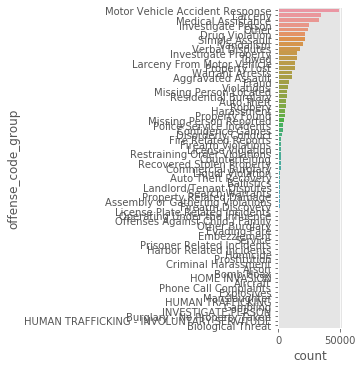

In [11]:
sns.catplot(y='offense_code_group',
            kind='count',
            data=data,
            order=data['offense_code_group'].value_counts().index);